# Fandango Project


In October 2015, FiveThirtyEight published a story and podcast calling Fandango's metrics on user ratings into question. After analyzing movie rating data on the website Fandango and many others they noticed that movies were very rarely rated less than 3 stars. This represented a serious issue as Fandango both sold movie tickets as well as displayed ratings. Meaning they had incentive to artifically inflate movie ratings.

For this project I have decided to recreate the original analysis that led to this discovery, using the datasets originally used in the article.


**The original article can be read here  [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**



### The Data

There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Step 1: Exploring the data**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**A scatterplot showing the relationship between a movie's rating and votes**

Text(0.5, 1.0, 'Ratings vs Votes')

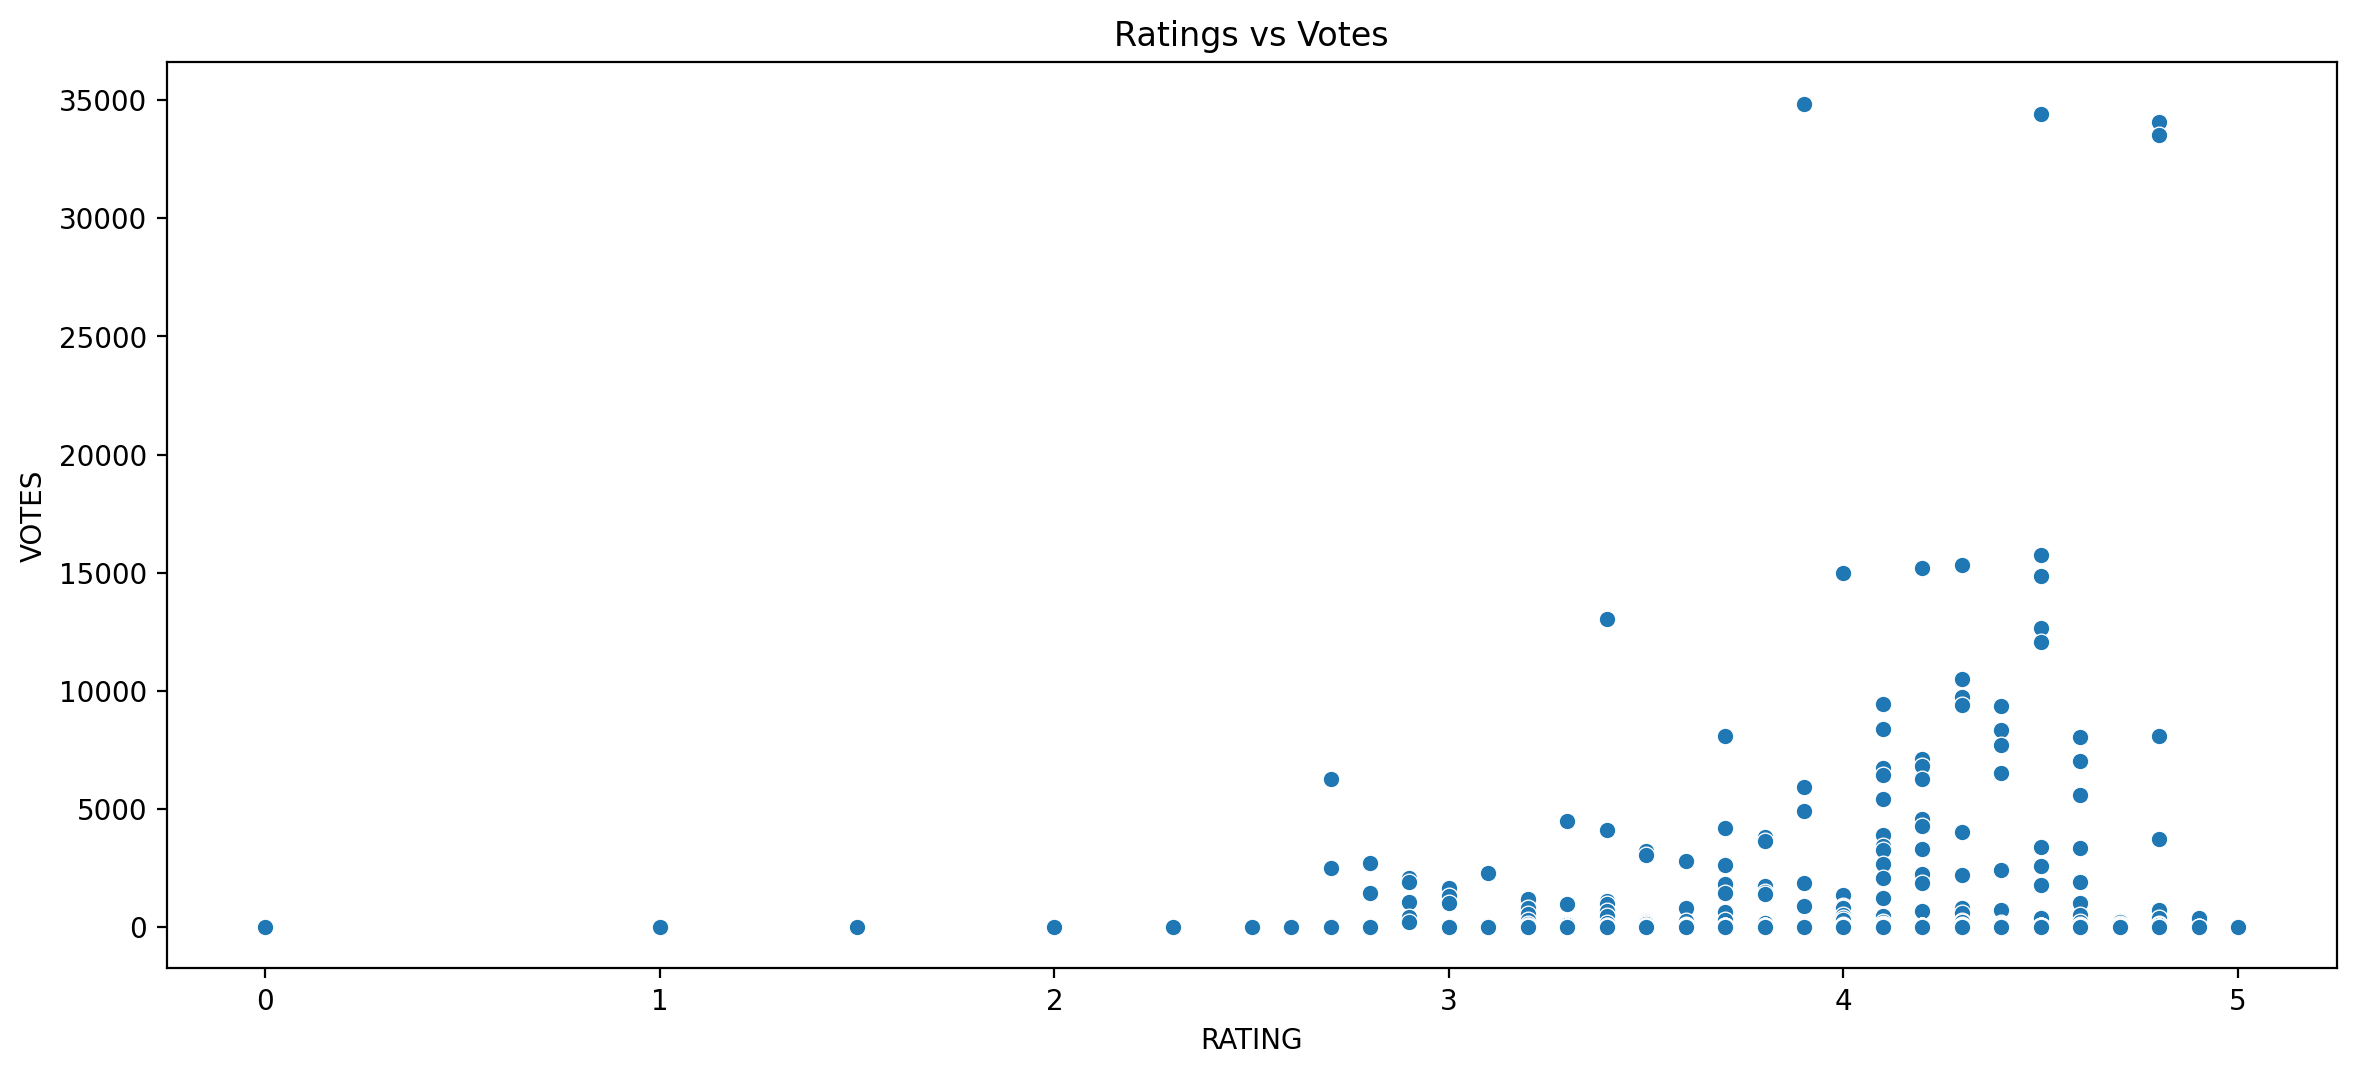

In [5]:

plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(x='RATING',y='VOTES',data=fandango)
plt.title('Ratings vs Votes')

In [6]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Step 2: Cleaning the data**
    
**First I will just be stripping the year from the film column and adding this as a separate column*

In [7]:
#adding a year column 
def extract_year(title):
    x = title.split('(')[-1].replace(')','')
    return x
fandango['YEAR'] = fandango['FILM'].apply(extract_year)
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Next I will remove any movies that have zero votes**

In [11]:
fandango = fandango[fandango['VOTES'] != 0]

69


**As noted in the article, Fandango has a star rating that they actually display on the website, however the HTML code for the site shows another value known as the true user rating. The original analysis showed a discrepancy between these values. Below is a visualization showing the difference.**


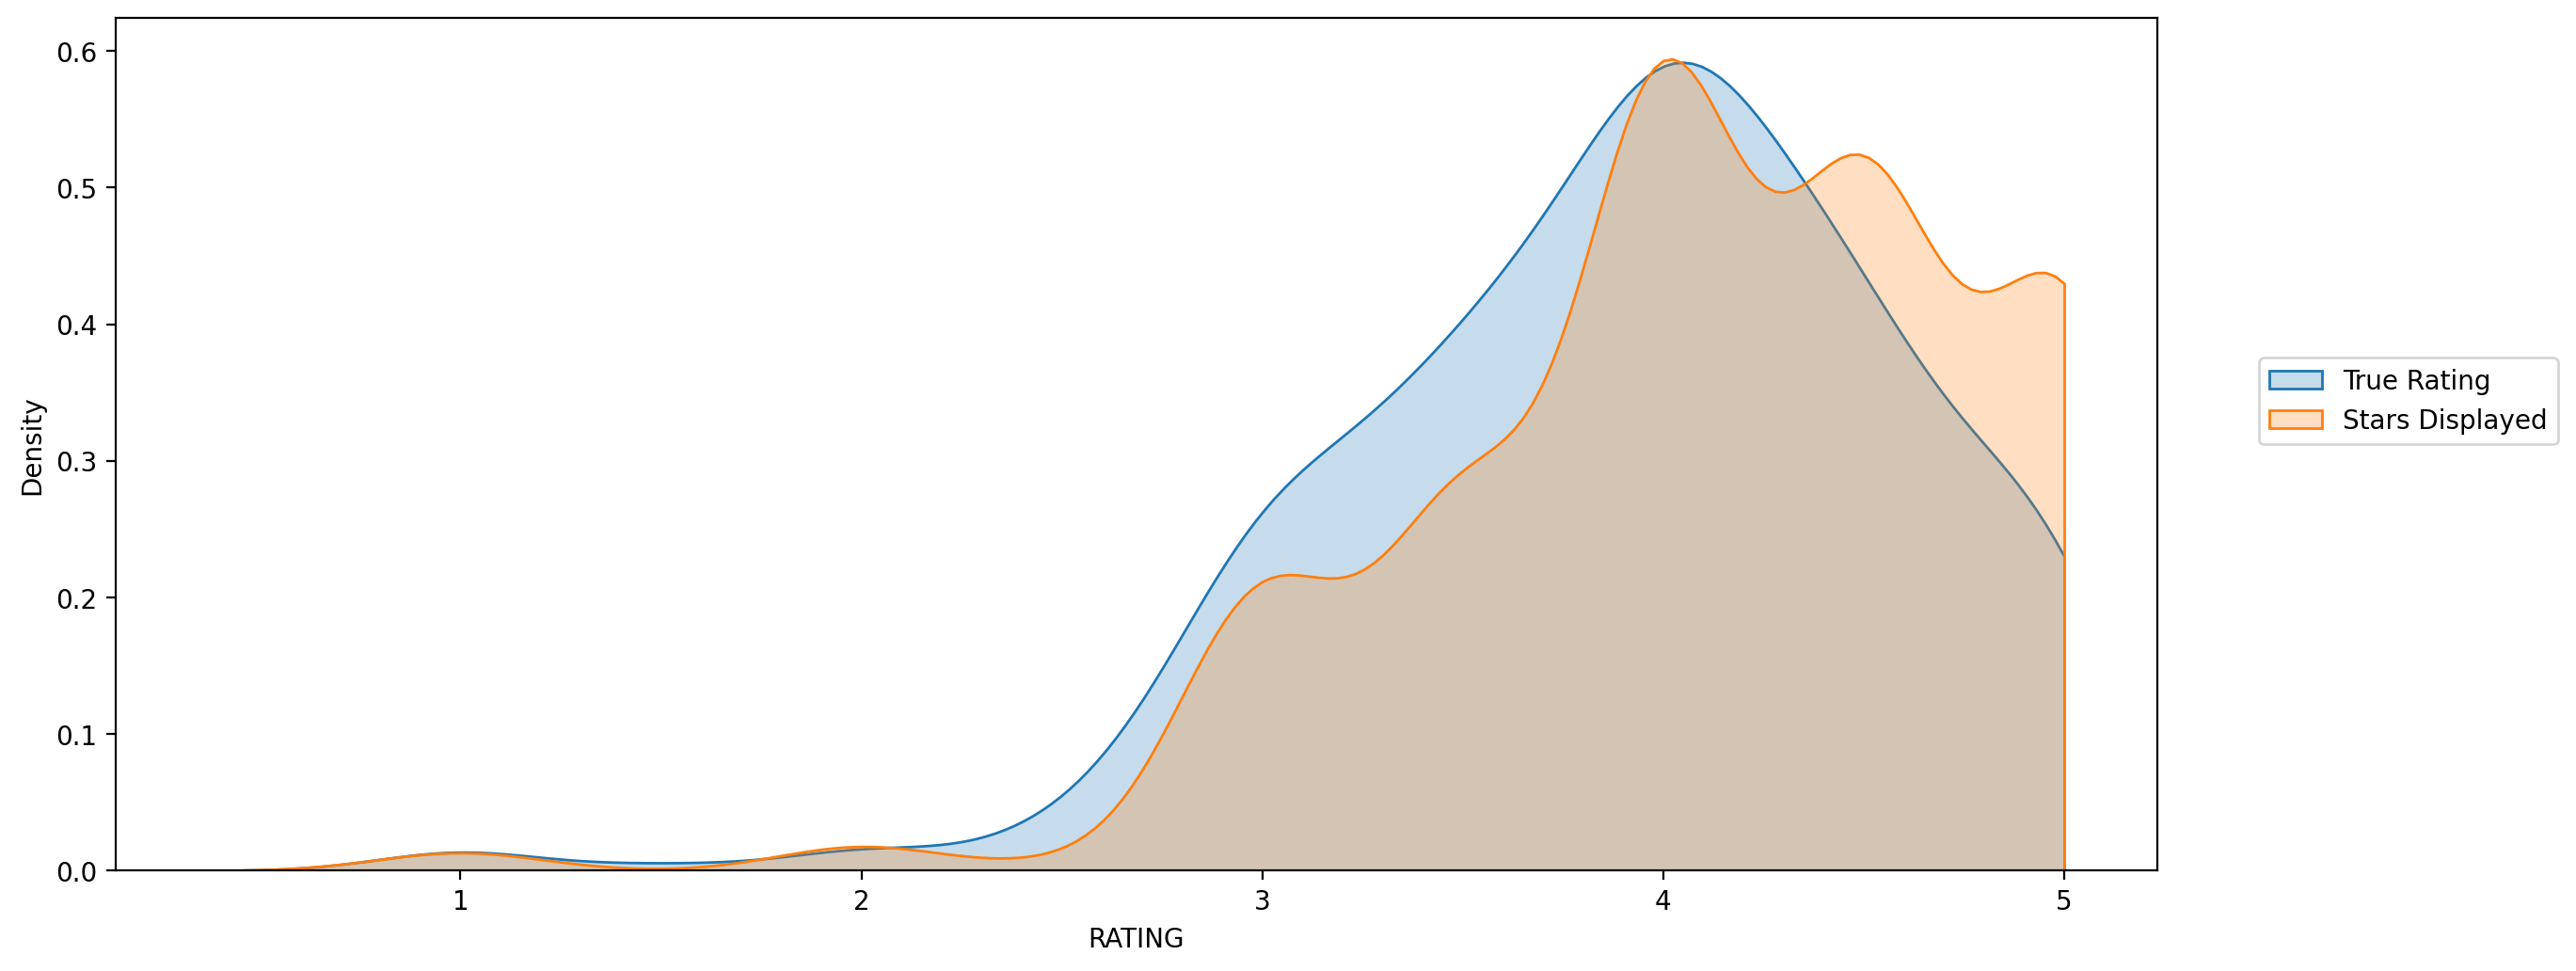

In [13]:
plt.figure(figsize=(14,6),dpi=200)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

**I will also add a column to quantify this difference.**

In [14]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango['STARS_DIFF'] = fandango['STARS_DIFF'].round(2)

<ipython-input-14-e8c358b5fd93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
<ipython-input-14-e8c358b5fd93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = fandango['STARS_DIFF'].round(2)


In [15]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Below is a count plot to display the number of times a certain difference occurs**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

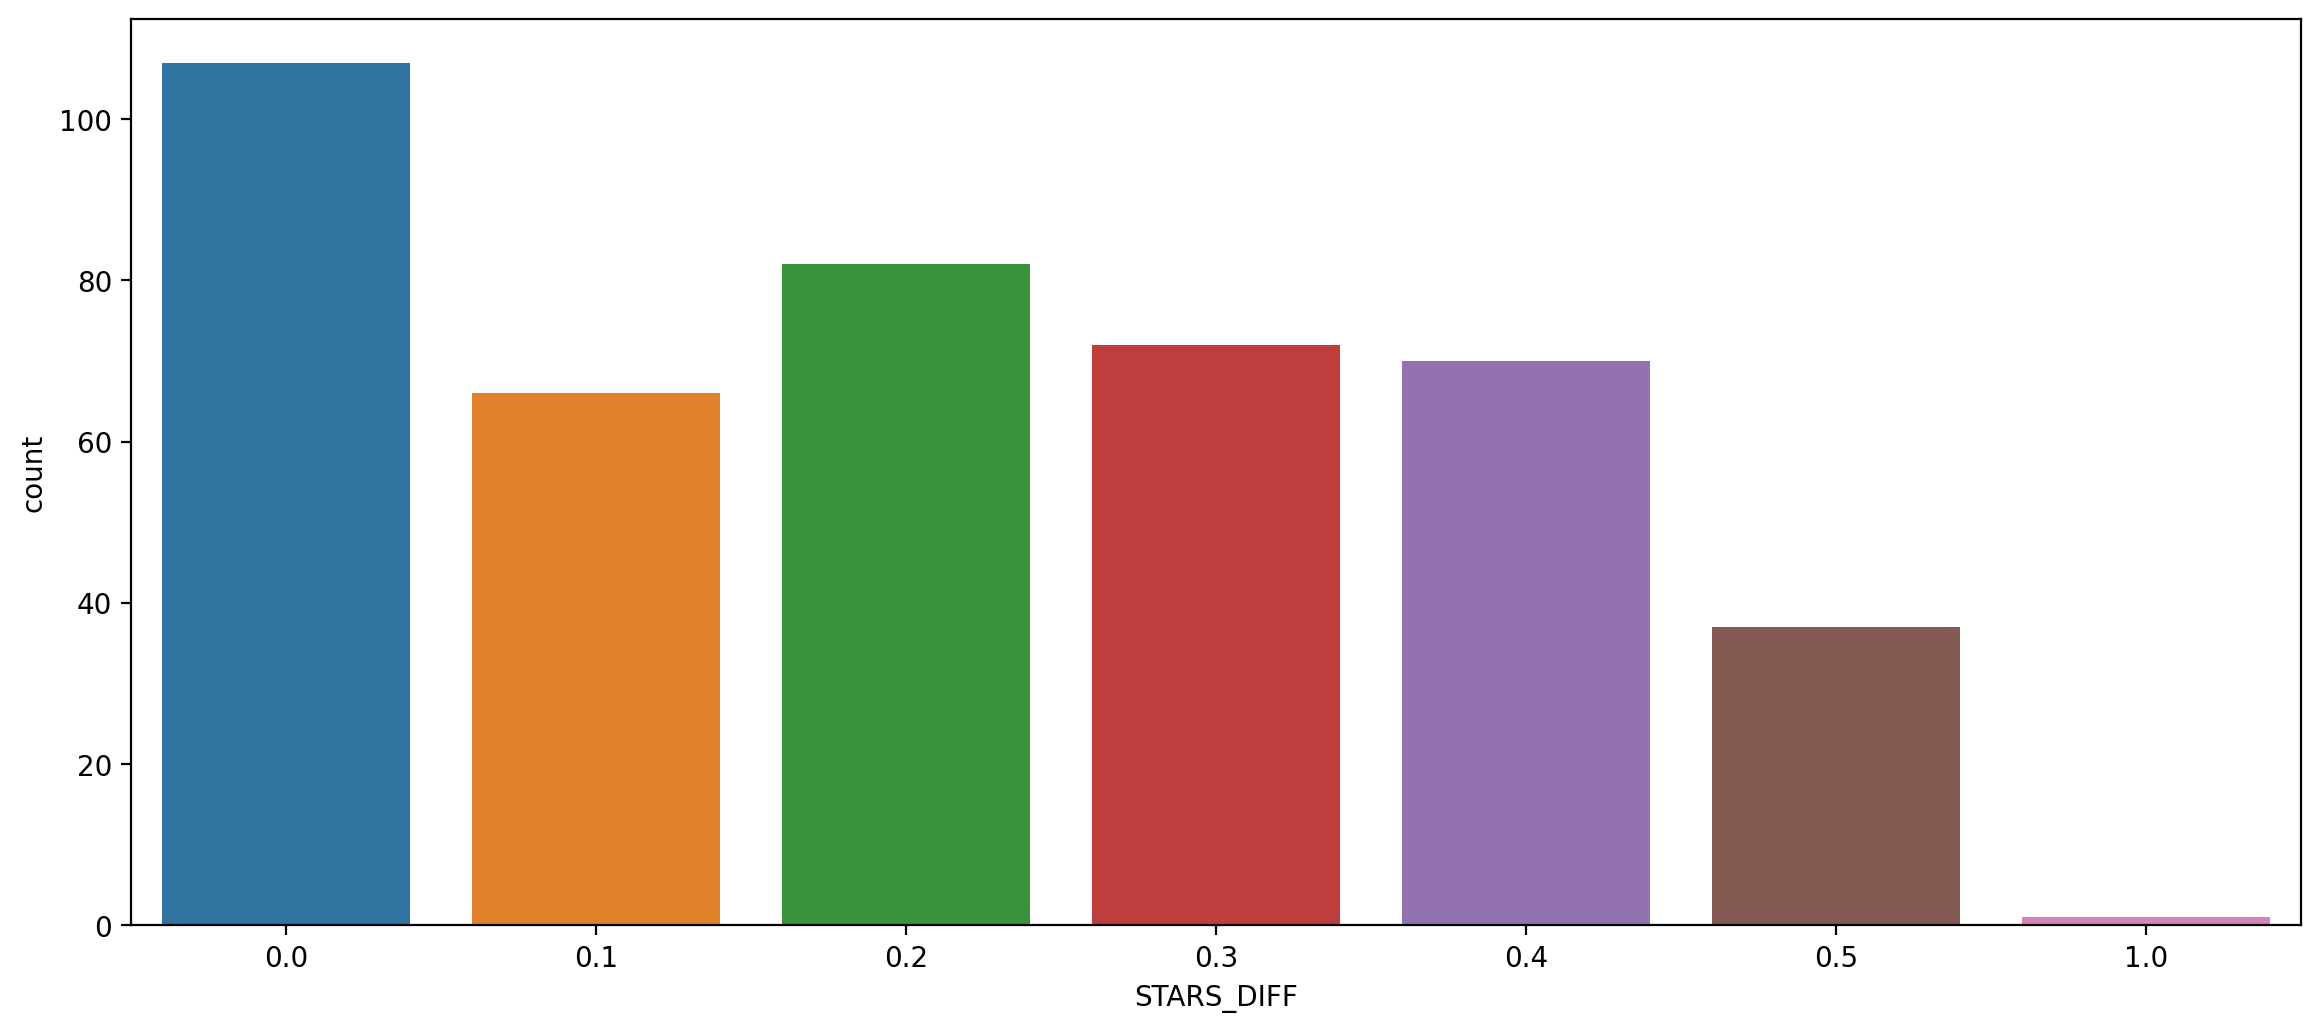

In [16]:
plt.figure(figsize=(14,6),dpi=200)
sns.countplot(data=fandango,x="STARS_DIFF")

**A difference between the true rating and stars may be due to rounding but this analysis shows something else is going on here with differences that cannot be explained by just rounding and as we can see a movie is never rounded down. In fact one movie was even off by a full 1 star. That movie is shown below**

In [17]:
fandango[fandango['STARS_DIFF'] == 1.0 ]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

**Now we can compare Fandango's ratings vs the other sites in our data set.**


In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Below is a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

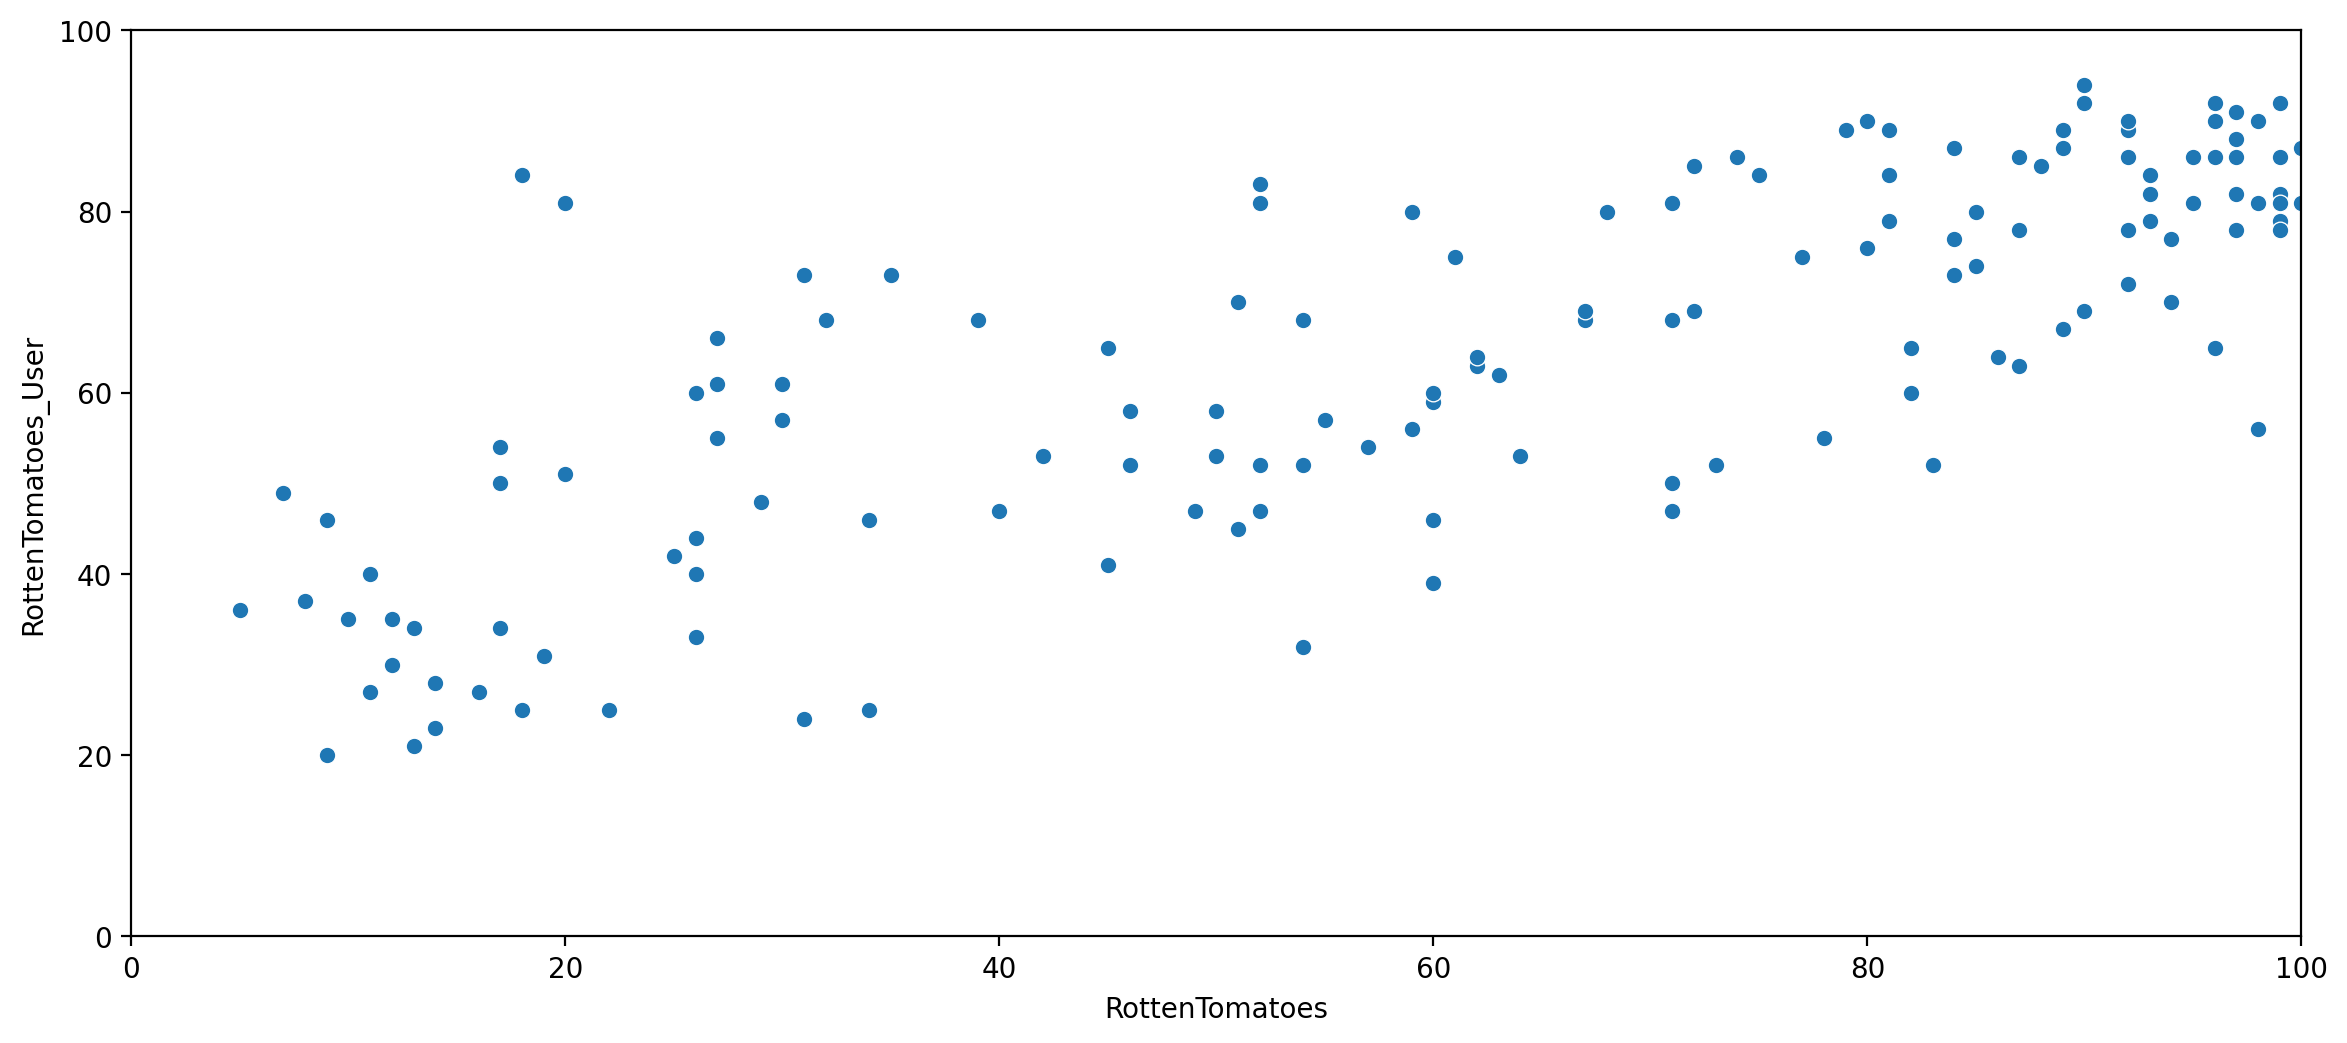

In [19]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(data=all_sites,x ='RottenTomatoes', y='RottenTomatoes_User' )
plt.xlim(0,100)
plt.ylim(0,100)

Again I will also quantify this difference by comparing the critics ratings and the RT User ratings. This is calculated by doing RottenTomatoes-RottenTomatoes_User, in other words Critics - User Score. Meaning values closer to 0 means agreeement between Critics and Users. A larger positive value means critics rated much higher than users. A larger negative value means users rated it much higher than critics.



In [20]:
all_sites['critics_user_diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [21]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Below is a distribution of the differences between RT Critics Score and RT User Score.**

<Figure size 3600x1200 with 0 Axes>

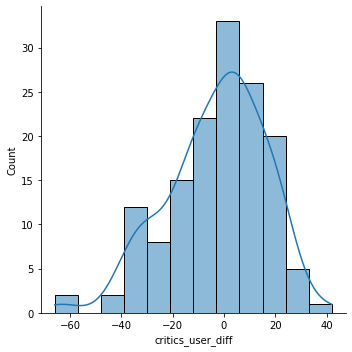

In [23]:
plt.figure(figsize=(18,6),dpi=200)
sns.displot(data=all_sites,x='critics_user_diff',kde=True)


**Here is a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

<Figure size 2000x1200 with 0 Axes>

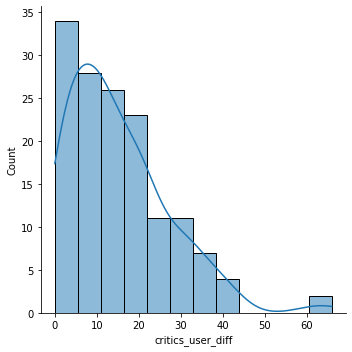

In [24]:
plt.figure(figsize=(10,6),dpi=200)
sns.displot(data=all_sites,x=all_sites['critics_user_diff'].abs(),kde=True)
plt.show()

**These are the top 5 movies users rated higher than critics on average:**

In [25]:
all_sites.nsmallest(5,'critics_user_diff')[['FILM','critics_user_diff']]

,FILM,critics_user_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**These are the top 5 movies critics scores higher than users on average.**

In [26]:
all_sites.nlargest(5,'critics_user_diff')[['FILM','critics_user_diff']]

,FILM,critics_user_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's quickly explore the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

** Here is a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

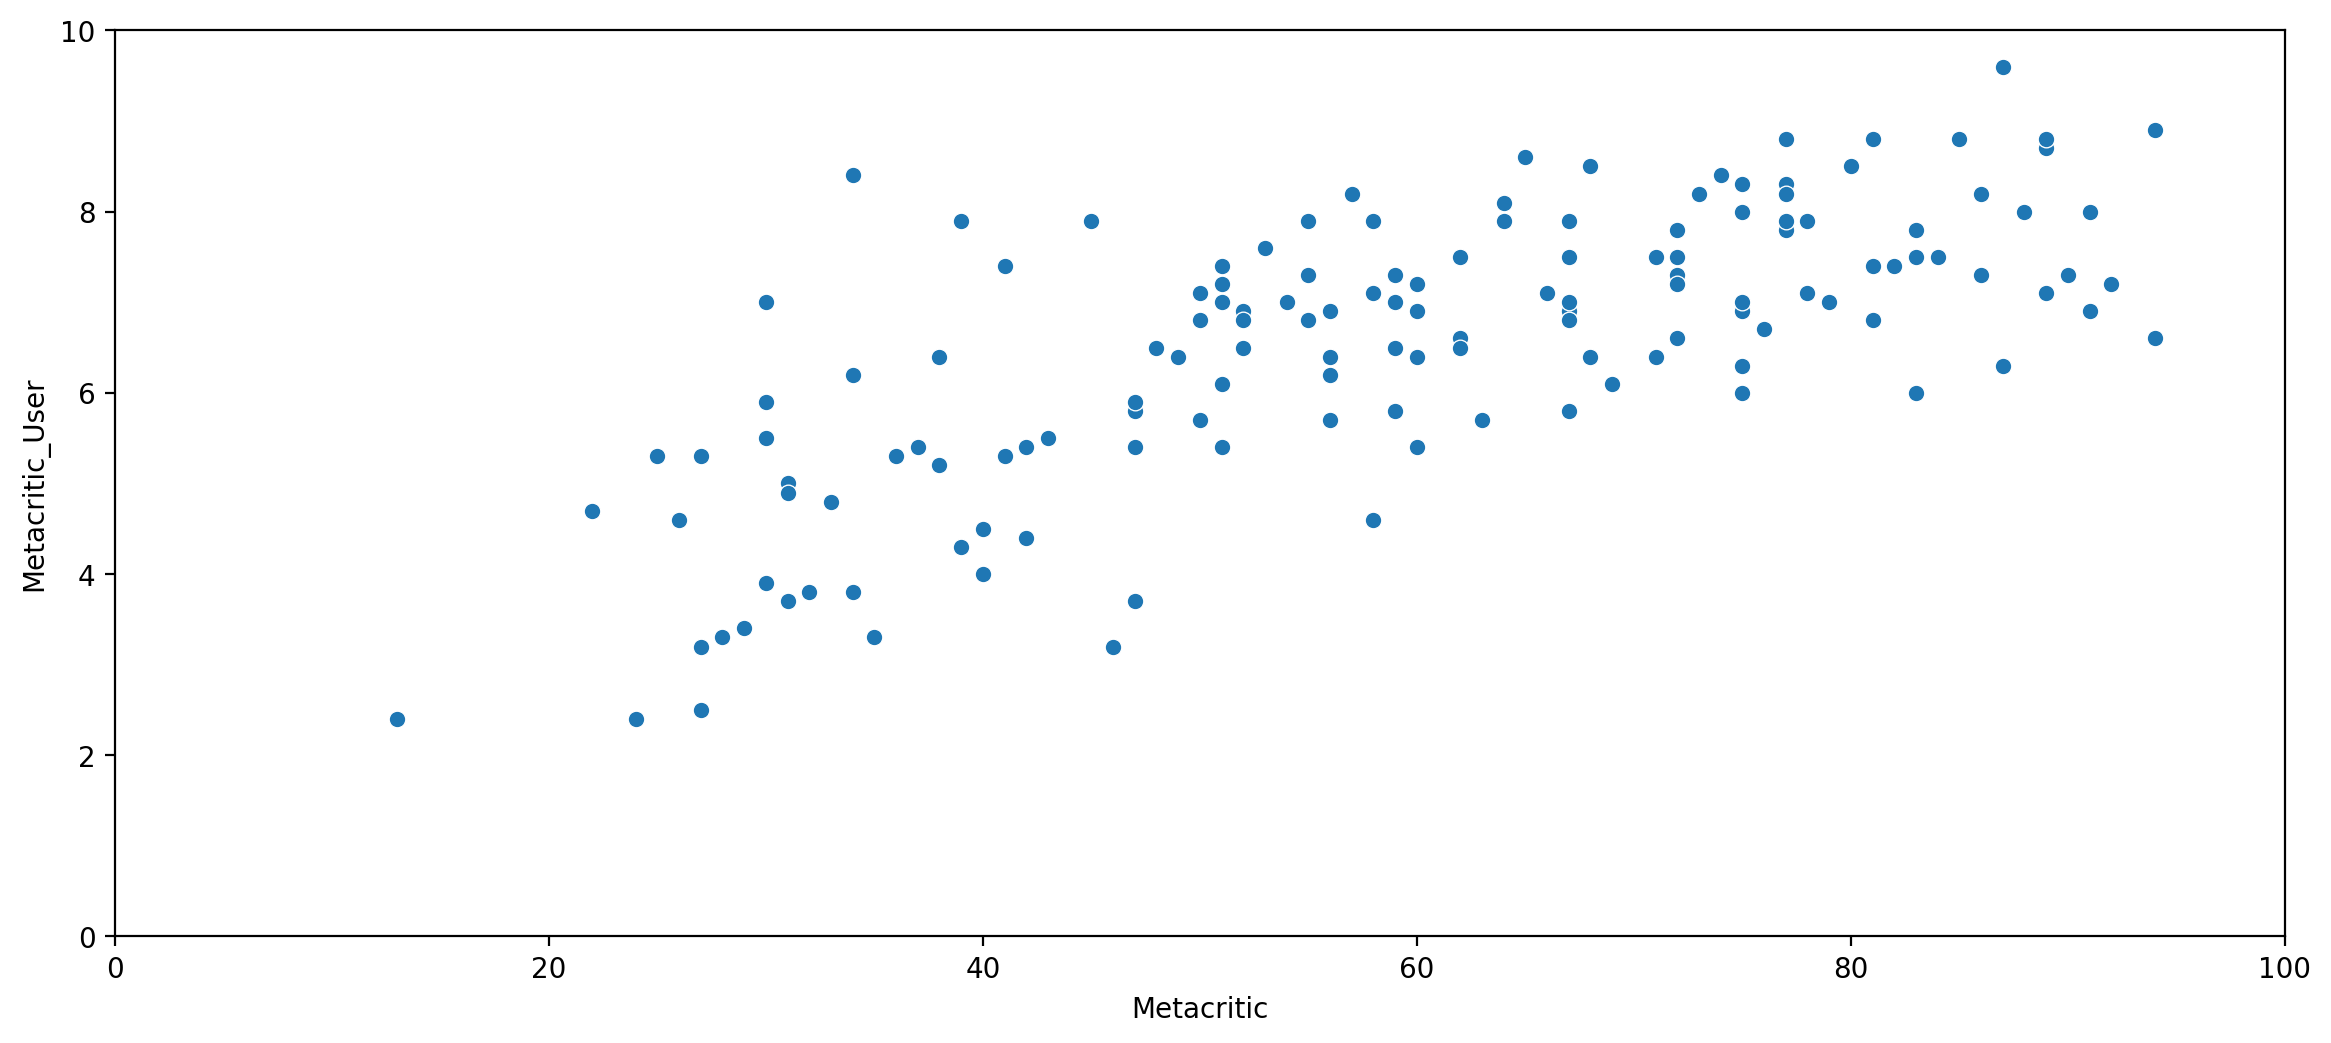

In [27]:
plt.figure(figsize=(14,6),dpi=200)
plt.xlim(0,100)
plt.ylim(0,10)
sns.scatterplot(data=all_sites,x ='Metacritic', y='Metacritic_User' )


## IMDB

Finally let's explore IMDB. Both Metacritic and IMDB report back vote counts. So we can start by analyzing these

**First here is a scatterplot showing the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

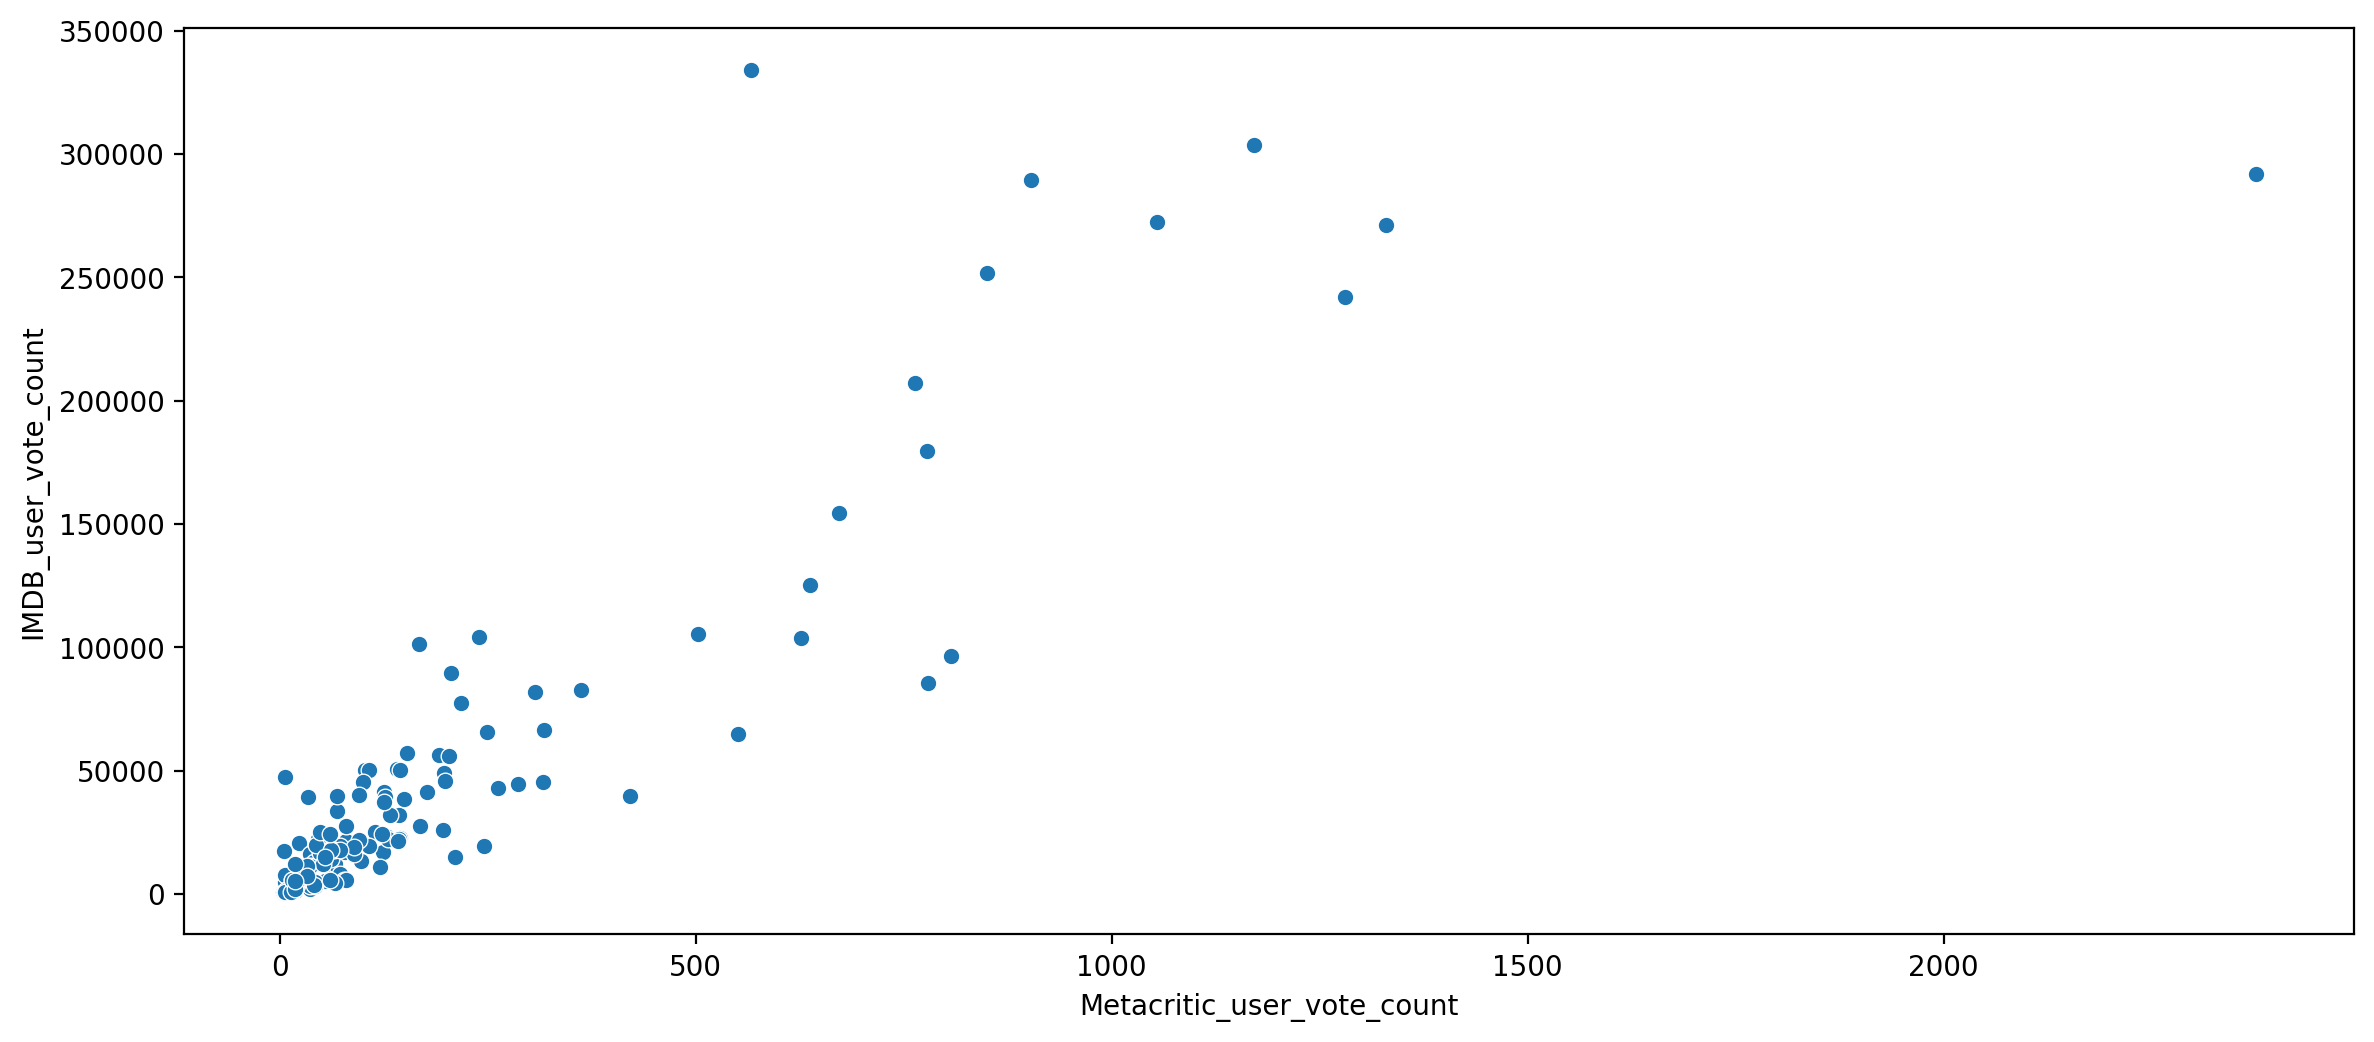

In [28]:
plt.figure(figsize=(14,6),dpi=200)
sns.scatterplot(data=all_sites,x ='Metacritic_user_vote_count', y='IMDB_user_vote_count' )

**Notice they are very similar except for two outliers here. For example, the movie with the highest vote count on IMDB only has about 500 Metacritic ratings. That movie is listed below**


In [29]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Comparatively here is the movie that has the highest Metacritic User Vote count?**

In [30]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally it is time to explore whether or not Fandango artificially displays higher ratings to boost ticket sales, by comparing their data to the other sites.

**First we will combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table. We only want to compare movies that are in both DataFrames, so we will use an *inner* merge to merge together both DataFrames**

In [31]:
df = pd.merge(fandango,all_sites,how='inner',on='FILM')
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [32]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


### Normalize values  to Fandango STARS and RATINGS 0-5 

Not every site uses the same scoring system so we will be normalizing all of them to the 0-5 system that Fandango uses. 


In [34]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [35]:
norm_scores = df[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [36]:
norm_scores

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [37]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_user_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

Below we can see the distribution of scores across all sites

In [38]:
### a function created to move the legend on the resulting kdeplot for better readability.
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

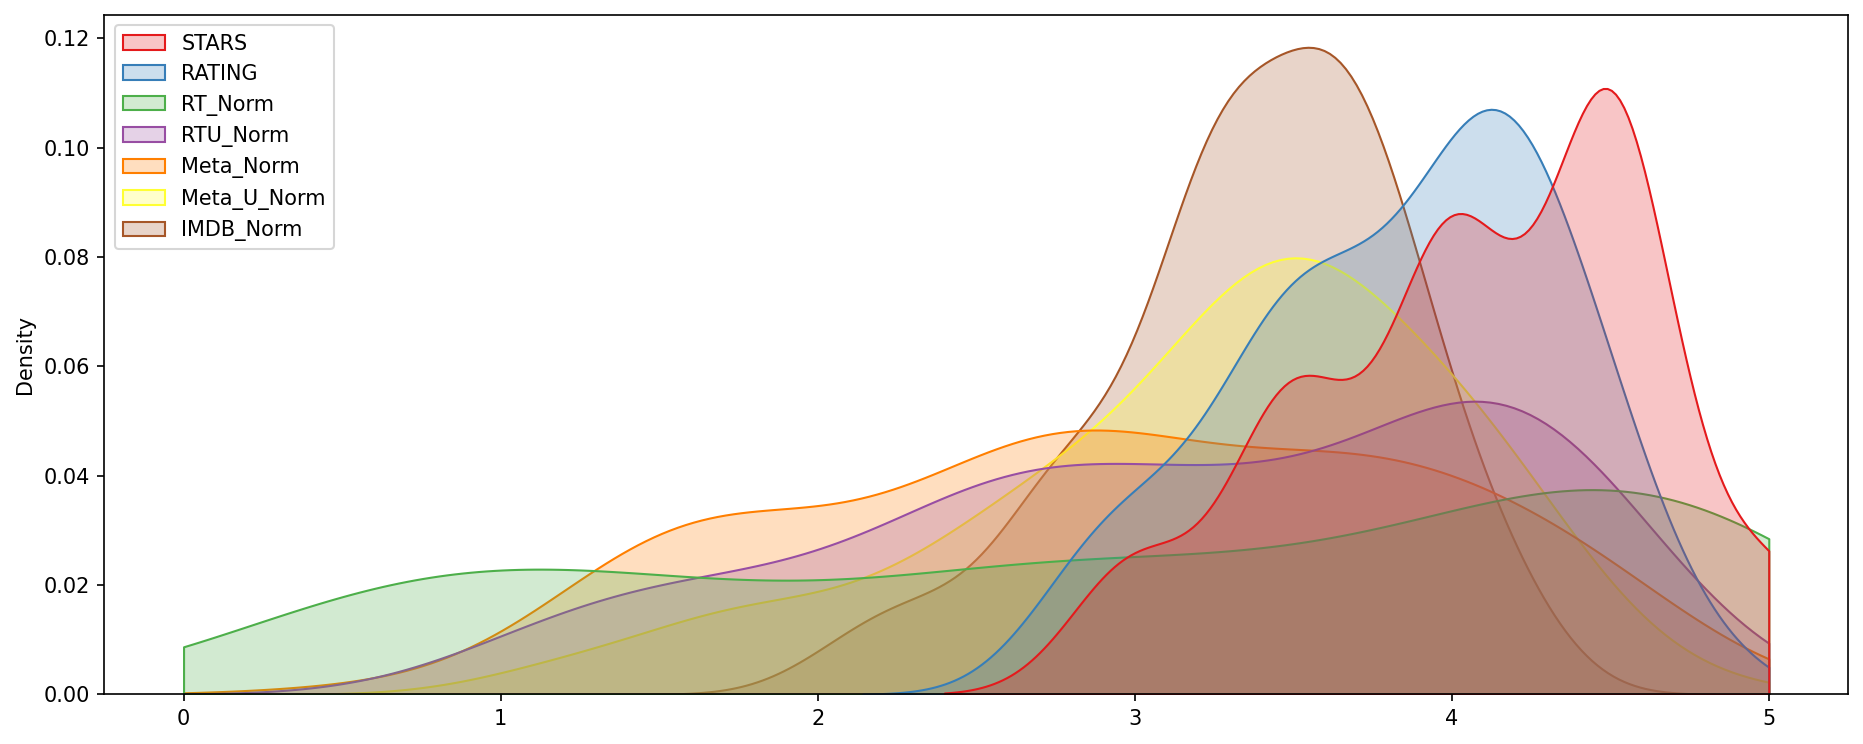

In [39]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**We can clearly see Fandango has an uneven distribution compared to the rest, with their distributions skewed farthest to the right. We can also see that RT critics have the most uniform distribution. So let us compare these two specifically** 



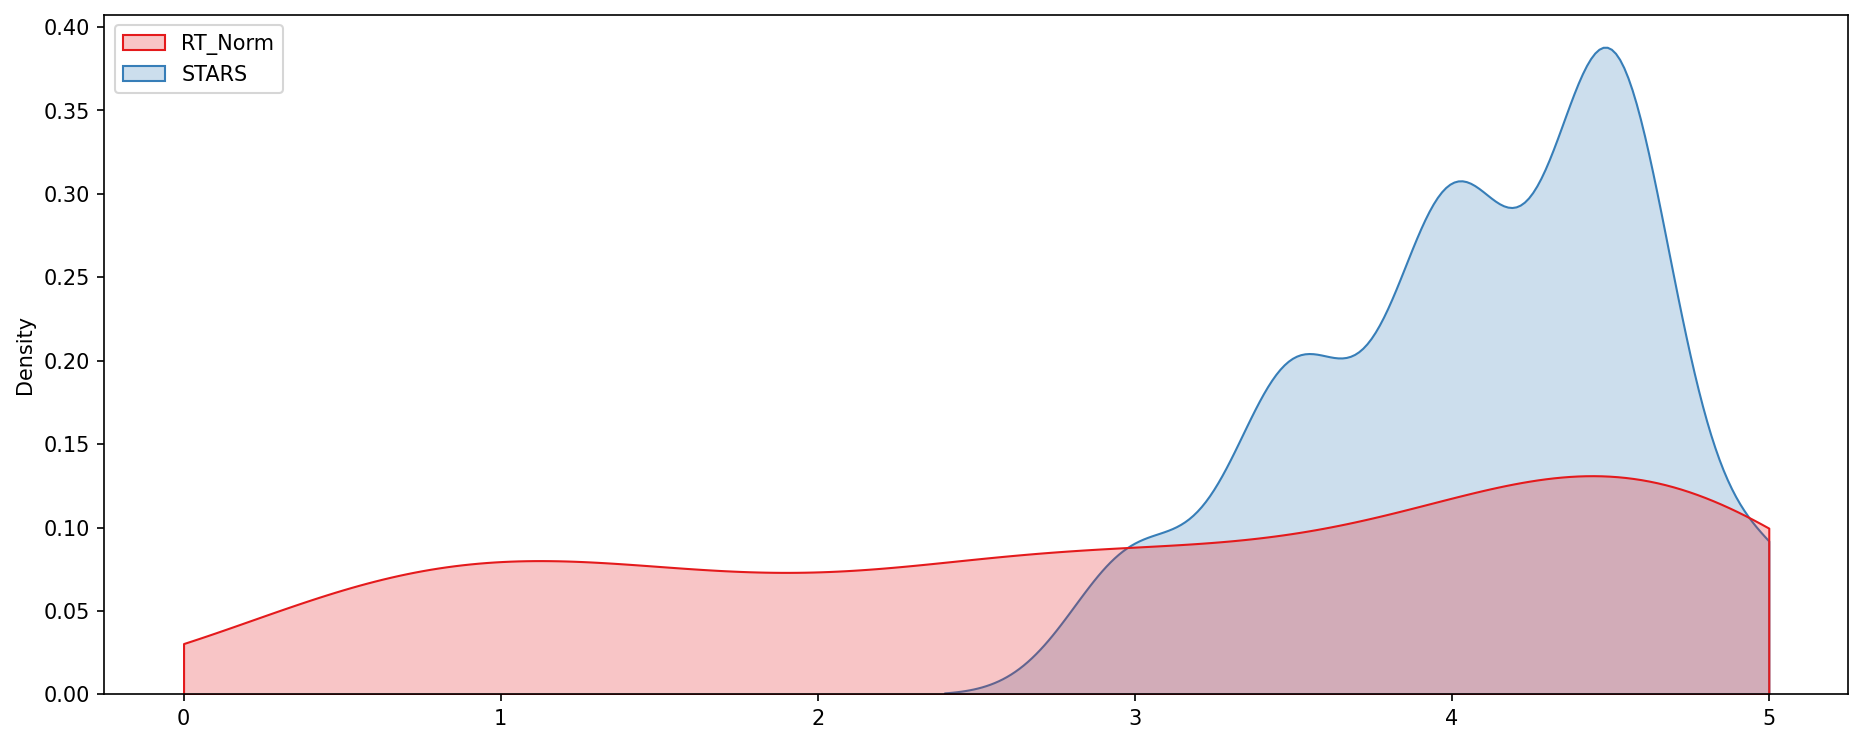

In [40]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Additionally here is a histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

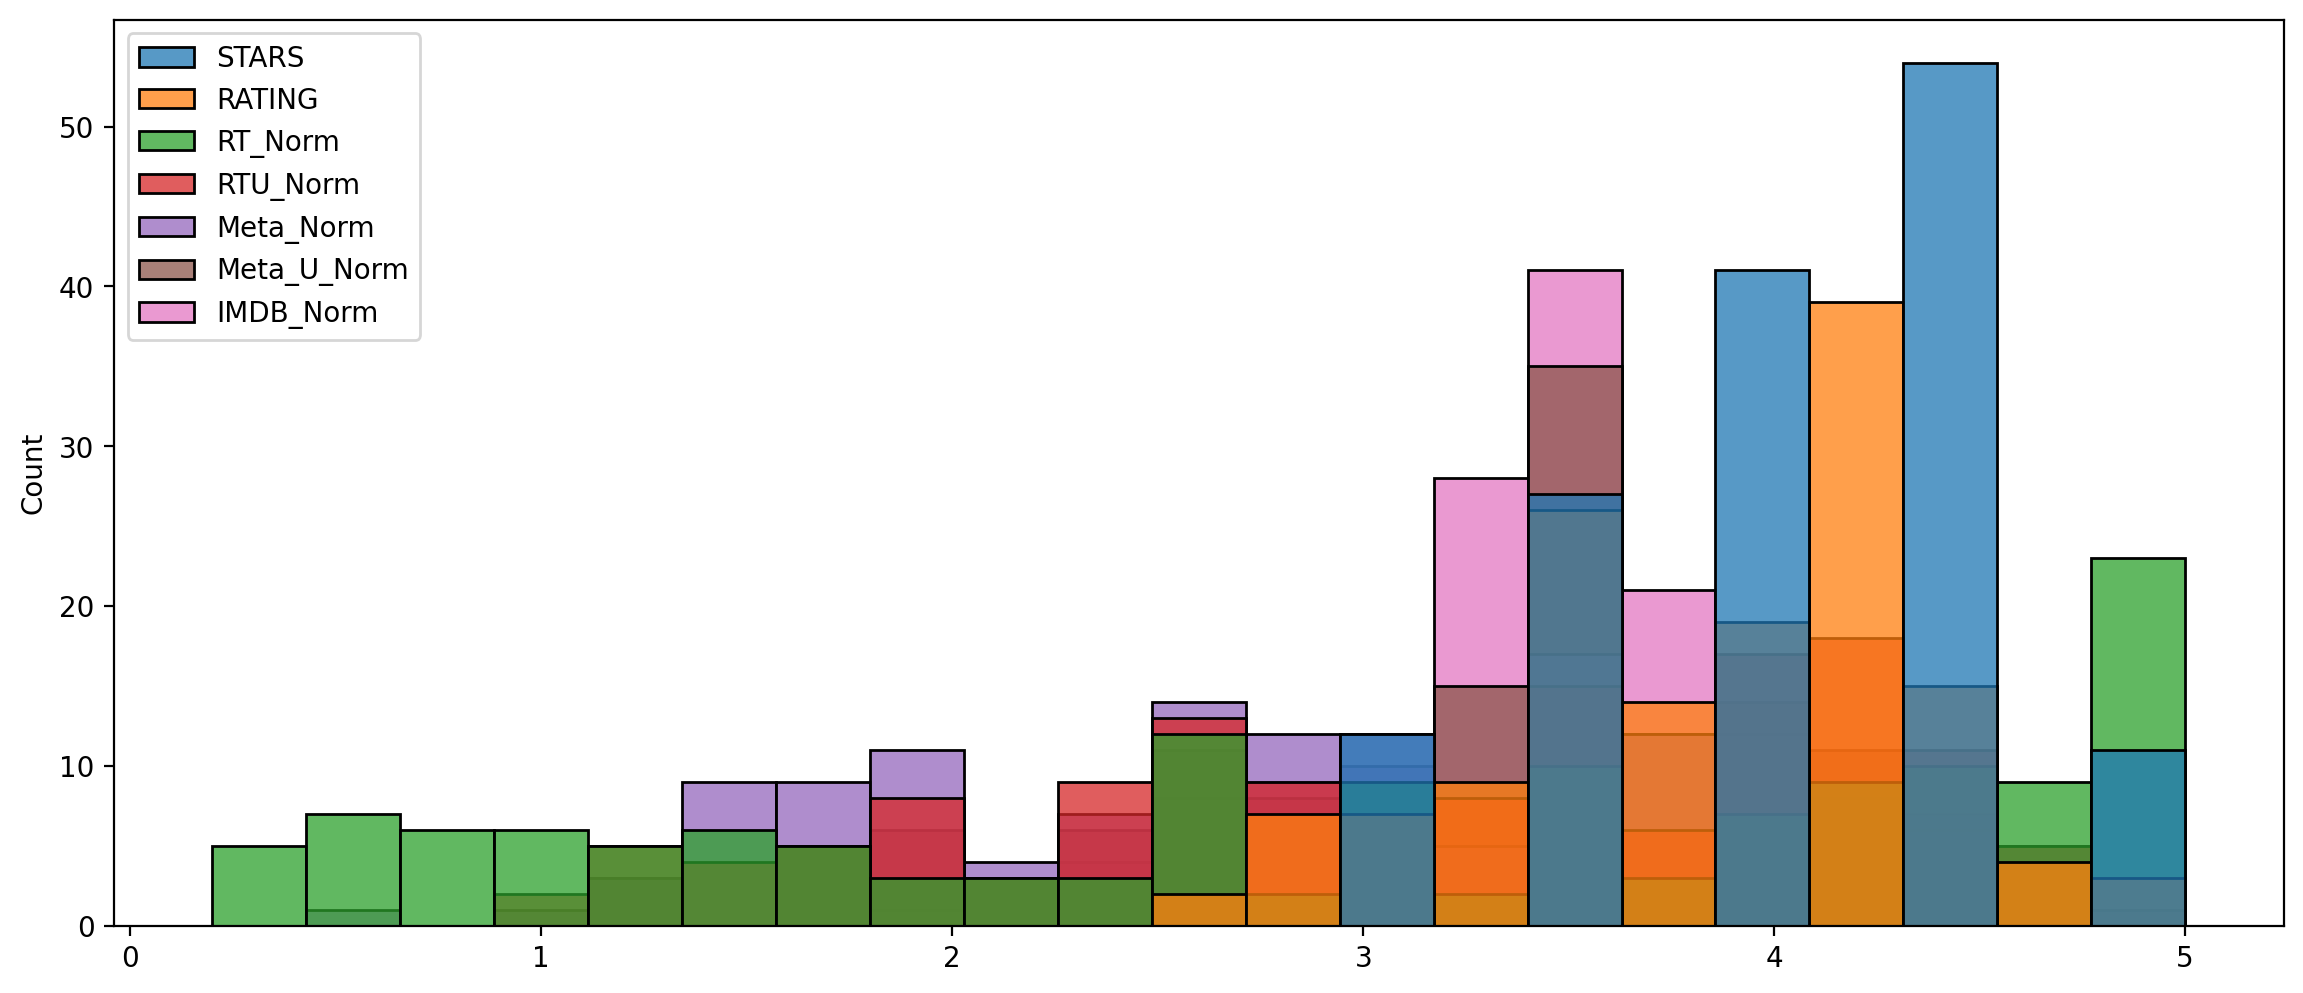

In [44]:
plt.figure(figsize=(14,6),dpi=200)
sns.histplot(norm_scores)


### Additionally here is a clustermap of the normalized scores

**A clustermap visualization of all normalized scores should cluster together highly rated movies together and cluster poorly rated ones. It will also allow us to see how the ratings are clustered.

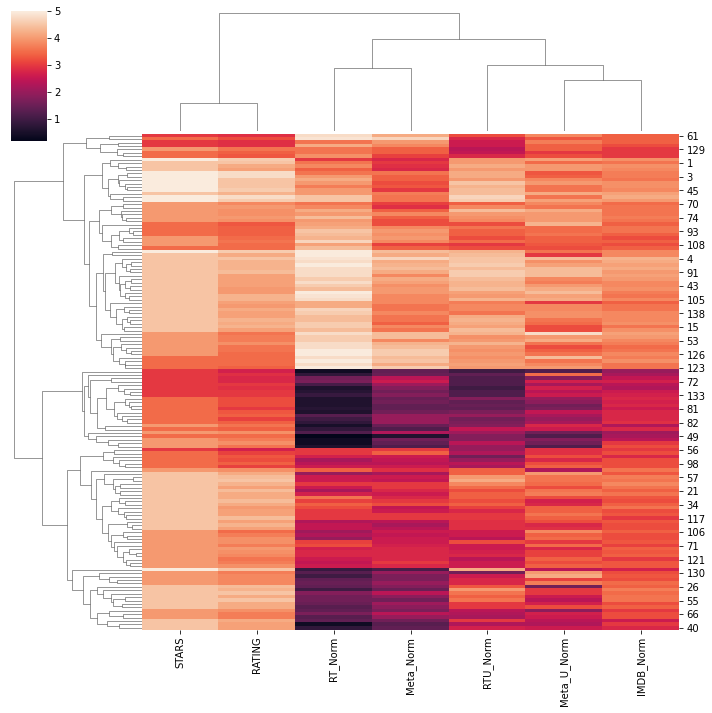

In [45]:
clustermap = norm_scores.drop('FILM',axis=1)
sns.clustermap(clustermap)

**In conclusion,Fandango is very clearly rating movies much higher than other sites, especially given it is also displaying a rounded up version of the rating.**

**Let's examine the top 10 worst movies based on RT critic ratings and see how these ones specifically compare.**

In [47]:
norm_scores.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**The above but visualized**

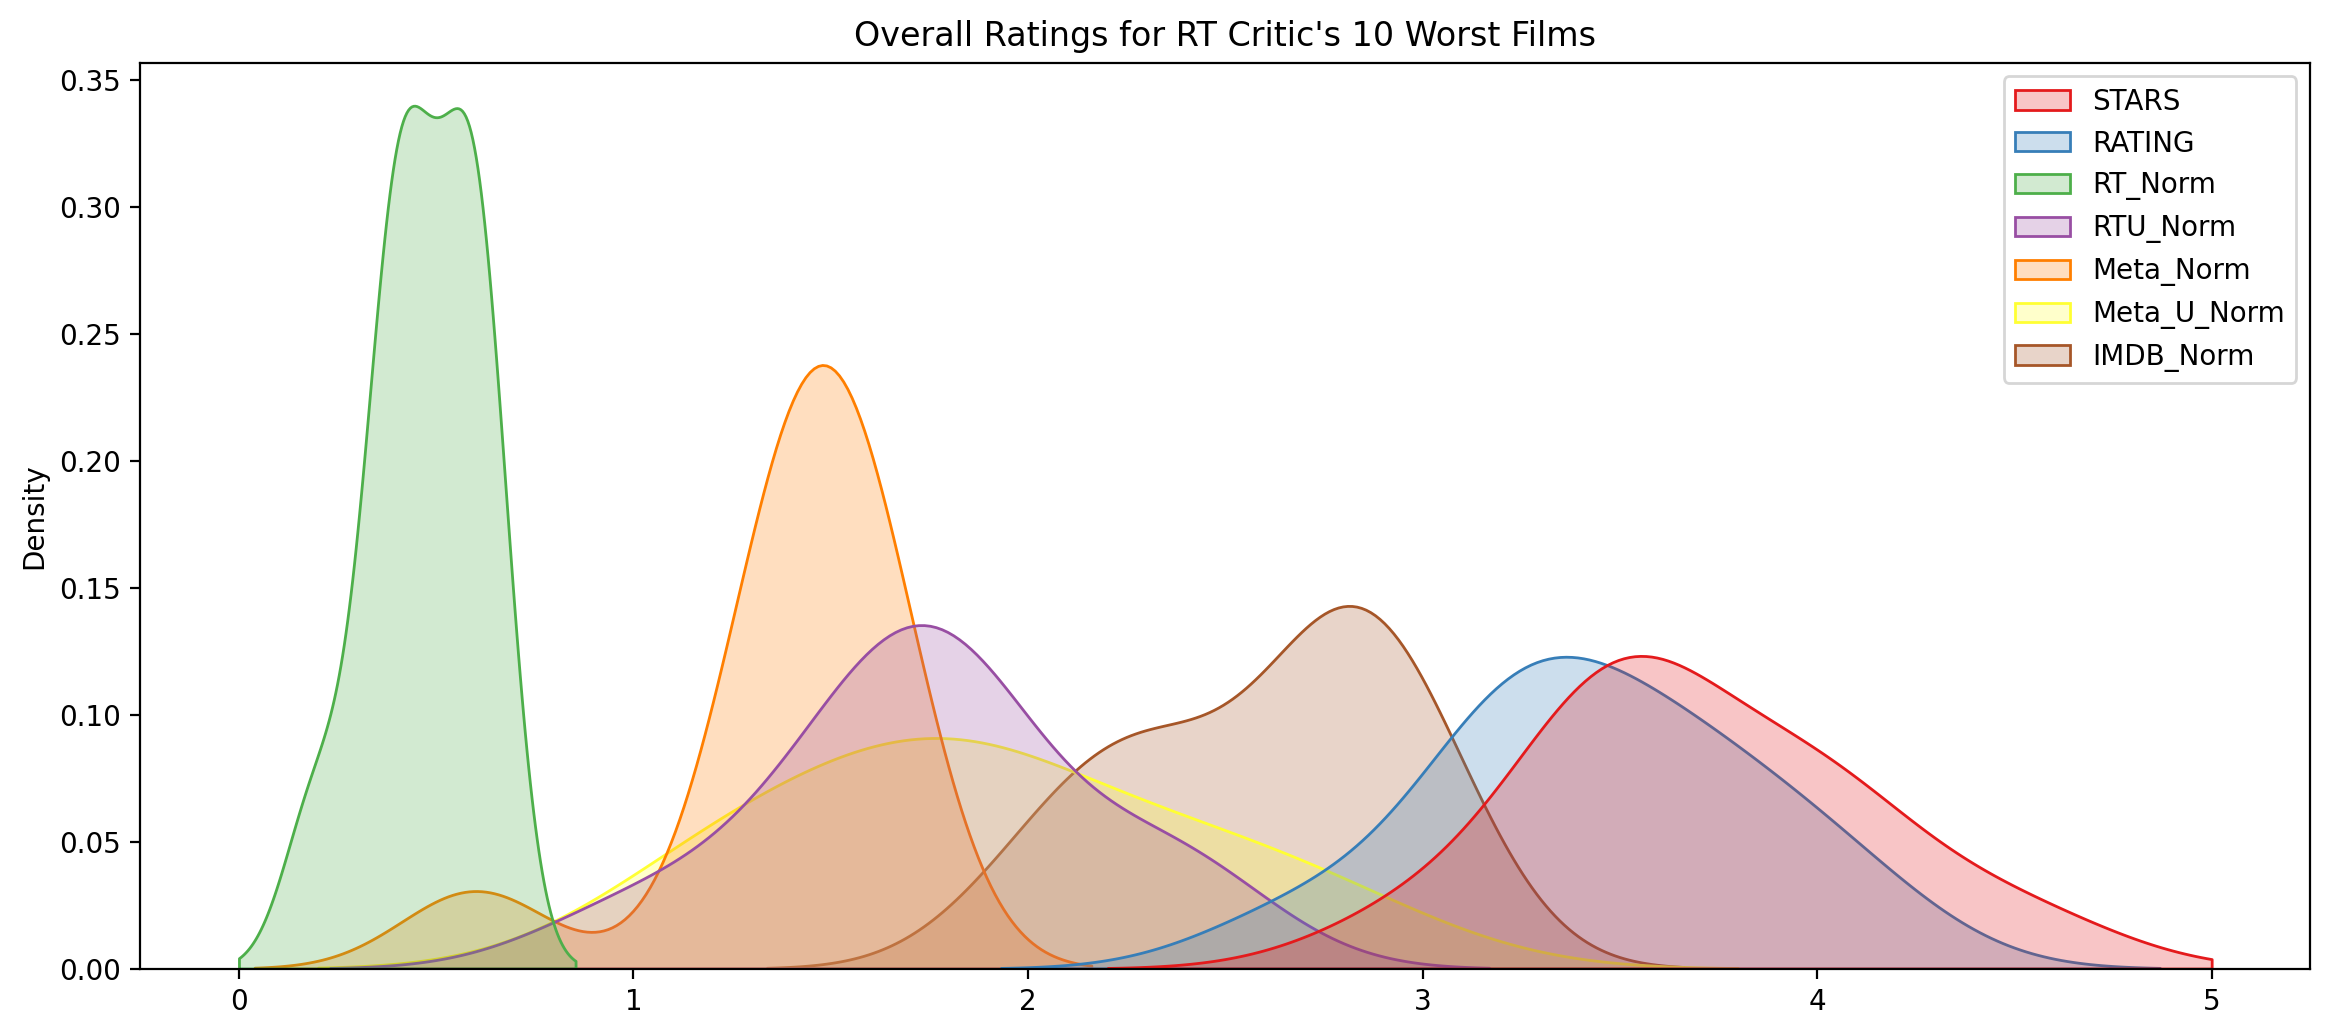

In [46]:
plt.figure(figsize=(14,6),dpi=200)
worst_films = norm_scores.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Overall Ratings for RT Critic's 10 Worst Films");

----